In [1]:
# Please visit:
#
# https://download.nkg-mn.com/credo/anomalies/
#
# Pretrained dots_v2.h5 and others can be downloaded from mentioned website.

In [2]:
from commons import *
from dataset_loader import load_from_file
from IPython.display import display
import matplotlib.pyplot as plt
import cv2

DOTS_DST = 'cache/dots_v2.pickle'
TRACKS_DST = 'cache/tracks_v2.pickle'
WORMS_DST = 'cache/worms_v2.pickle'
ARTIFACTS_DST = 'cache/artifacts_v2.pickle'

DOTS_AC = 'cache/dots_v2_hough.h5'
TRACKS_AC = 'cache/tracks_v2_hough.h5'
WORMS_AC = 'cache/worms_v2_hough.h5'
ARTIFACTS_AC = 'cache/artifacts_v2_hough.h5'


def train_and_test(train_set, validation_set, fn):
    autoencoder = original_autoencoder()
    autoencoder = train_or_cache(train_set, autoencoder, fn, validation_set=validation_set, force_train=True)

    for df_func, df_name in zip(
            [dm_func_mean],
            ['mean']
    ):
        for img_set, set_names in zip([validation_set], ['train']):
            decoded = autoencoder.predict(img_set)

            vis, errors = visualize_predictions(decoded, img_set, df_func, False, 16)
            img_path = fn.replace('.h5', '-vis.png')
            hist_path = fn.replace('.h5', '-hist.png')
            cv2.imwrite(img_path, vis)
            display(Image.open(img_path))
            if len(img_set) > 256:
                vis, errors = visualize_predictions(decoded, img_set, df_func, False)
                img_path = fn.replace('.h5', '-vis_full.png')
                cv2.imwrite(img_path, vis)

            plt.figure(figsize=(8,6))
            plt.hist(errors, bins=100, alpha=0.5, label=set_names)
            plt.xlabel("Data", size=14)
            plt.ylabel("Count", size=14)
            plt.title(df_name)
            plt.legend(loc='upper right')
            plt.savefig(hist_path)


def load_and_train(src, out):
    images, augmented = load_from_file(src)
    images = normalize_rotation(images)
    augmented = normalize_rotation(augmented)
    train_and_test(np.expand_dims(augmented, axis=-1), np.expand_dims(images, axis=-1), out)

320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
Epoch 1/50
1290/1290 [==============================] - 21s 13ms/step - loss: 0.0060 - accuracy: 0.9934 - val_loss: 3.8979e-05 - val_accuracy: 0.9983
Epoch 2/50
1290/1290 [==============================] - 17s 13ms/step - loss: 2.8422e-05 - accuracy: 0.9979 - val_loss: 2.5037e-05 - val_accuracy: 0.9983
Epoch 3/50
1290/1290 [==============================] - 17s 13ms/step - loss: 1.2547e-05 - accuracy: 0.9979 - val_loss: 2.7454e-05 - val_accuracy: 0.9983
Epoch 4/50
1290/1290 [==============================] - 17s 13ms/step - loss: 7.6122e-06 - accuracy: 0.9979 - val_loss: 2.1744e-05 - val_accuracy: 0.9983
Epoch 5/50
1290/1290 [==============================] - 17s 13ms/step - loss: 8.1231e-06 - accuracy: 0.9979 - val_loss: 2.9187e-05 - val_accuracy: 0.9983
Epoch 6/50
1290/1290 [==============================] - 17s 13ms/step - loss: 5.1687e-06 - accuracy: 0.9979 - val_loss: 2.3425e-05 - val_accuracy: 0.9983
Epoch 7/50
1

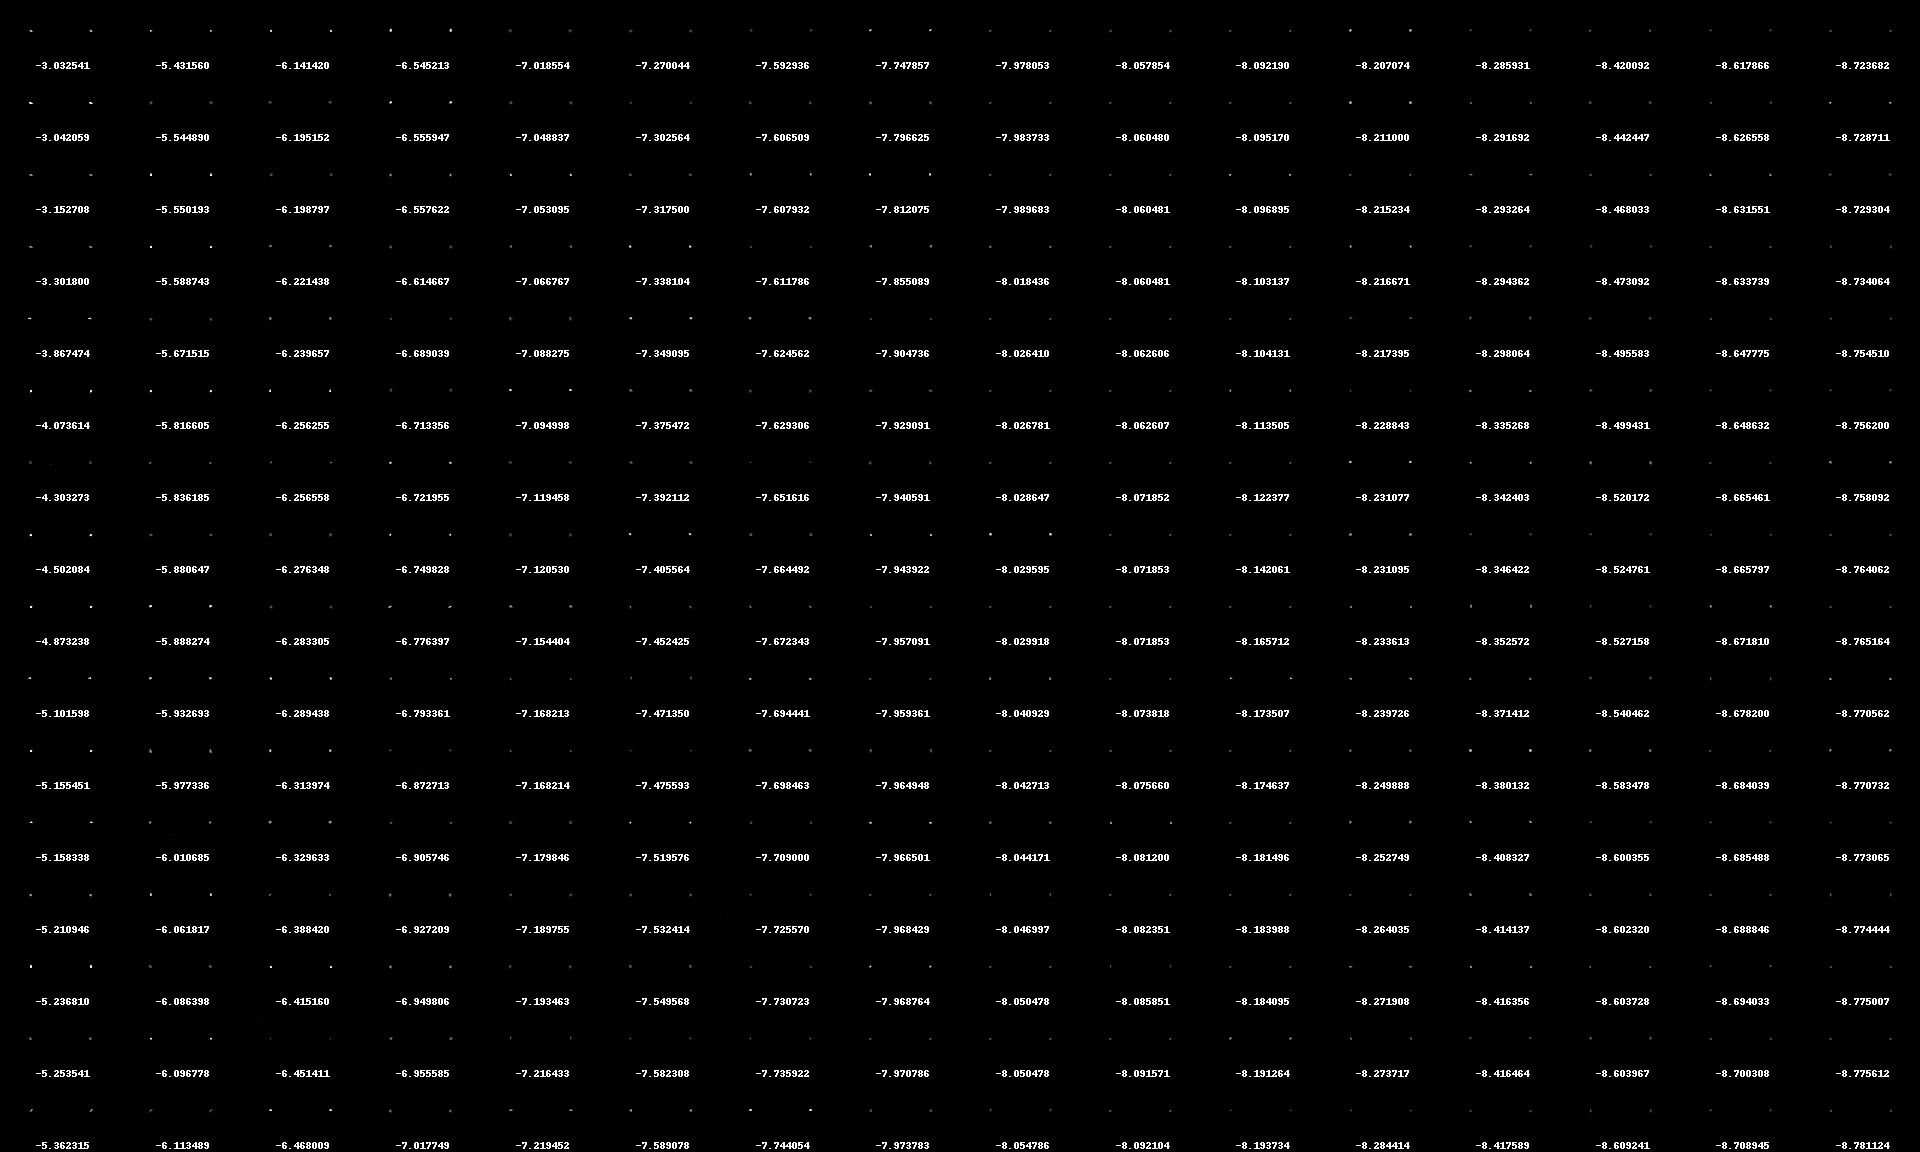

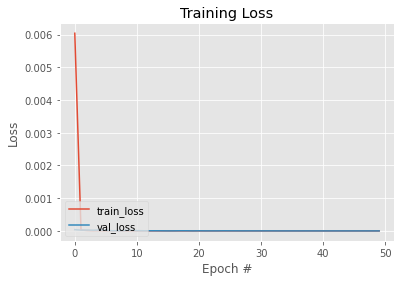

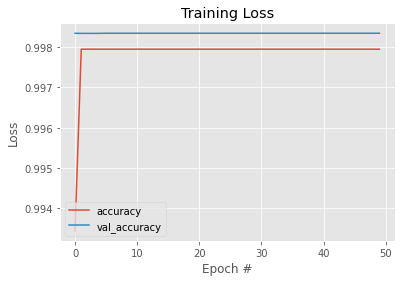

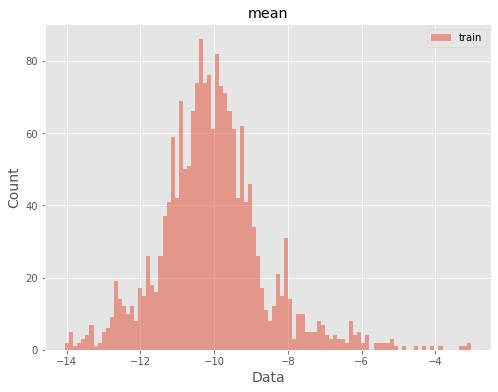

In [3]:
load_and_train(DOTS_DST, DOTS_AC)

320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
Epoch 1/50
2108/2108 [==============================] - 28s 13ms/step - loss: 0.0235 - accuracy: 0.9719 - val_loss: 2.8414e-04 - val_accuracy: 0.9950
Epoch 2/50
2108/2108 [==============================] - 26s 13ms/step - loss: 1.3458e-04 - accuracy: 0.9940 - val_loss: 1.3939e-04 - val_accuracy: 0.9950
Epoch 3/50
2108/2108 [==============================] - 27s 13ms/step - loss: 7.4436e-05 - accuracy: 0.9940 - val_loss: 1.1139e-04 - val_accuracy: 0.9950
Epoch 4/50
2108/2108 [==============================] - 27s 13ms/step - loss: 5.7751e-05 - accuracy: 0.9940 - val_loss: 8.6487e-05 - val_accuracy: 0.9950
Epoch 5/50
2108/2108 [==============================] - 27s 13ms/step - loss: 5.4512e-05 - accuracy: 0.9940 - val_loss: 5.6991e-05 - val_accuracy: 0.9950
Epoch 6/50
2108/2108 [==============================] - 27s 13ms/step - loss: 4.4625e-05 - accuracy: 0.9940 - val_loss: 6.2021e-05 - val_accuracy: 0.9950
Epoch 7/50
2

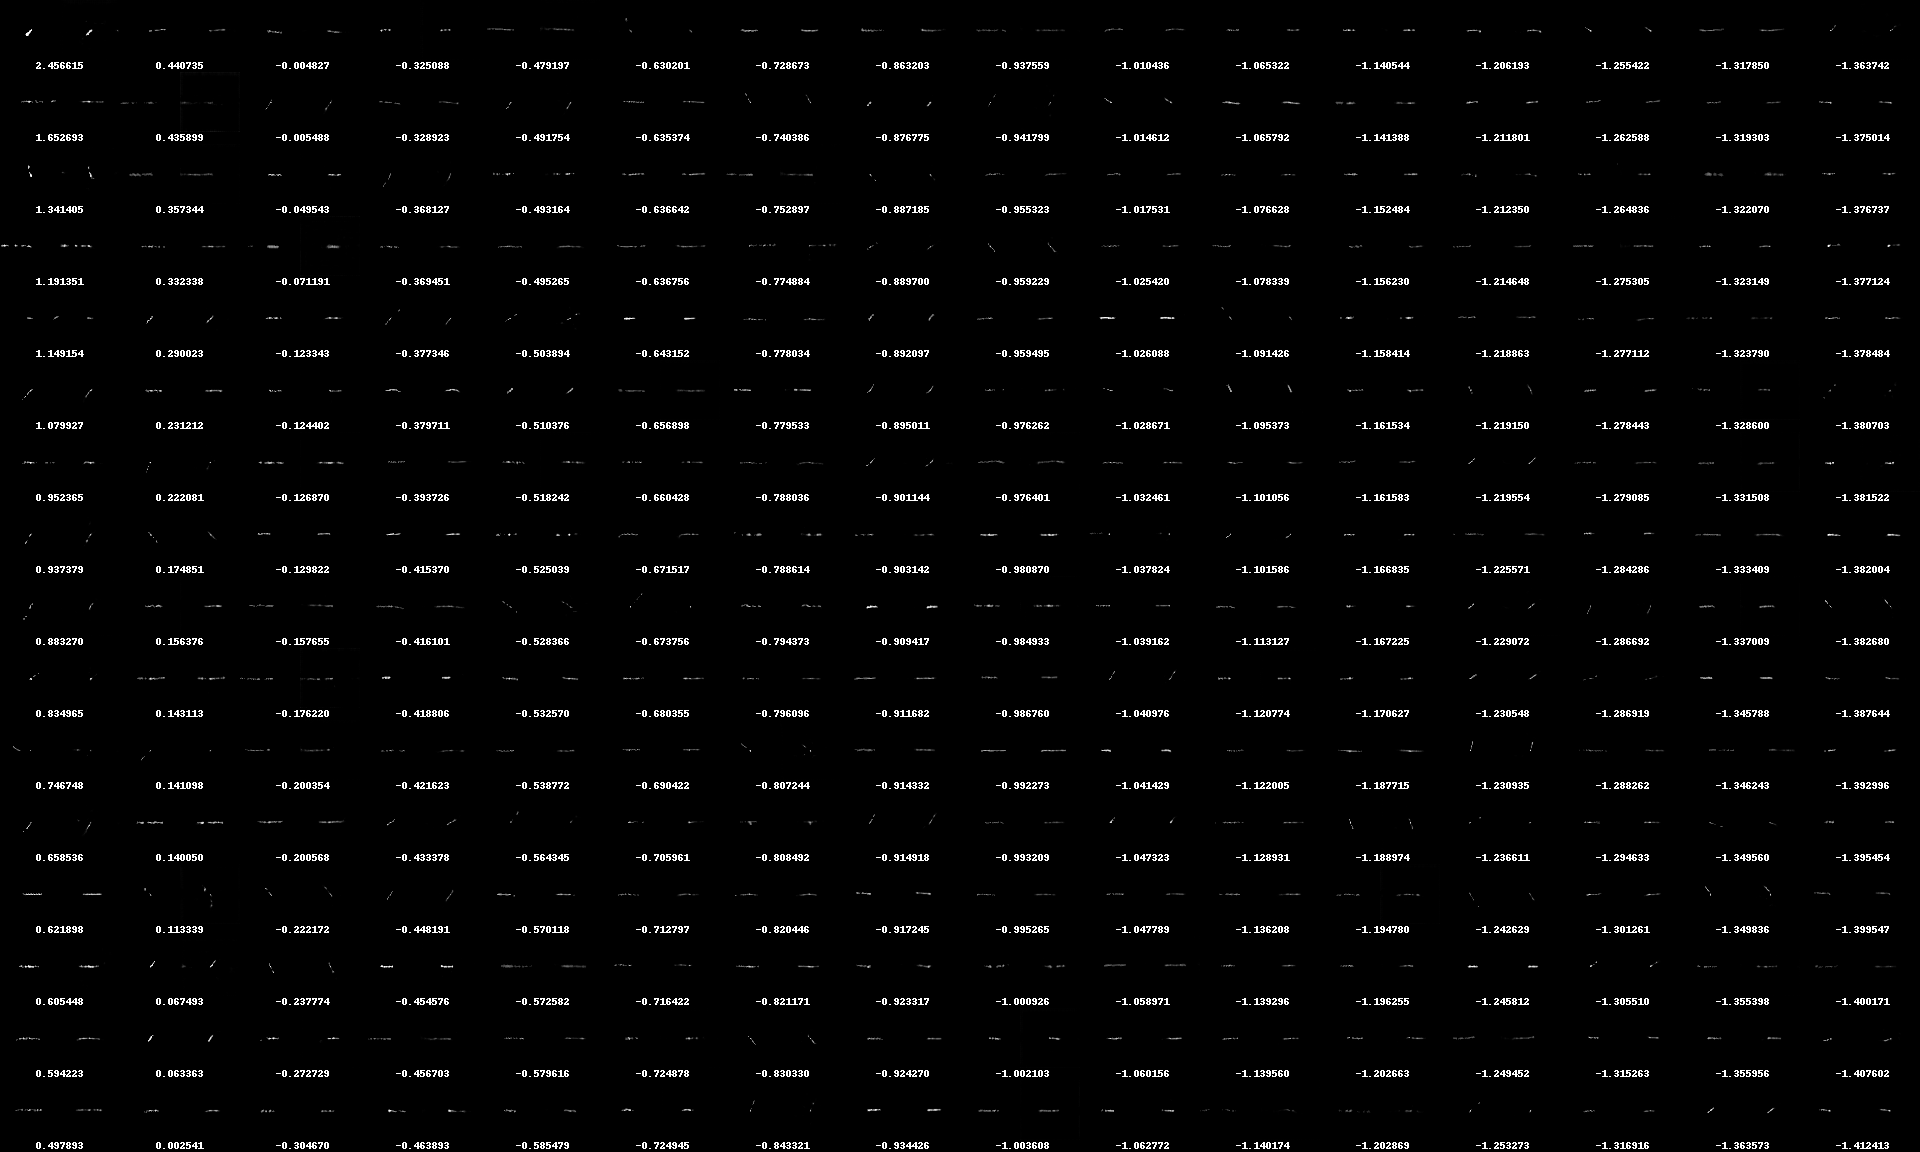

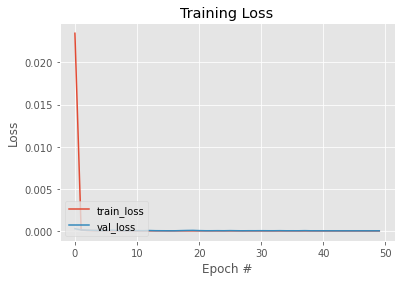

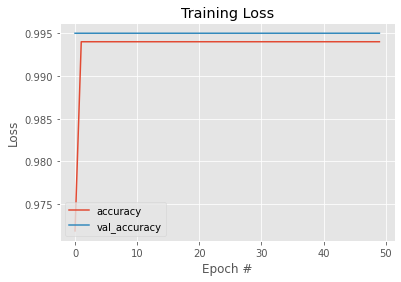

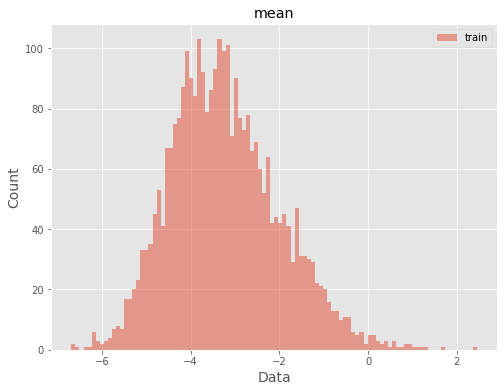

In [4]:
load_and_train(TRACKS_DST, TRACKS_AC)

320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
Epoch 1/50
341/341 [==============================] - 5s 12ms/step - loss: 0.0462 - accuracy: 0.9495 - val_loss: 0.0324 - val_accuracy: 0.9609
Epoch 2/50
341/341 [==============================] - 4s 11ms/step - loss: 0.0302 - accuracy: 0.9616 - val_loss: 0.0291 - val_accuracy: 0.9642
Epoch 3/50
341/341 [==============================] - 4s 11ms/step - loss: 0.0286 - accuracy: 0.9628 - val_loss: 0.0283 - val_accuracy: 0.9646
Epoch 4/50
341/341 [==============================] - 4s 11ms/step - loss: 0.0280 - accuracy: 0.9631 - val_loss: 0.0280 - val_accuracy: 0.9646
Epoch 5/50
341/341 [==============================] - 4s 11ms/step - loss: 0.0276 - accuracy: 0.9634 - val_loss: 0.0266 - val_accuracy: 0.9658
Epoch 6/50
341/341 [==============================] - 4s 11ms/step - loss: 0.0264 - accuracy: 0.9644 - val_loss: 0.0255 - val_accuracy: 0.9669
Epoch 7/50
341/341 [==============================] - 4s 11ms/step - loss:

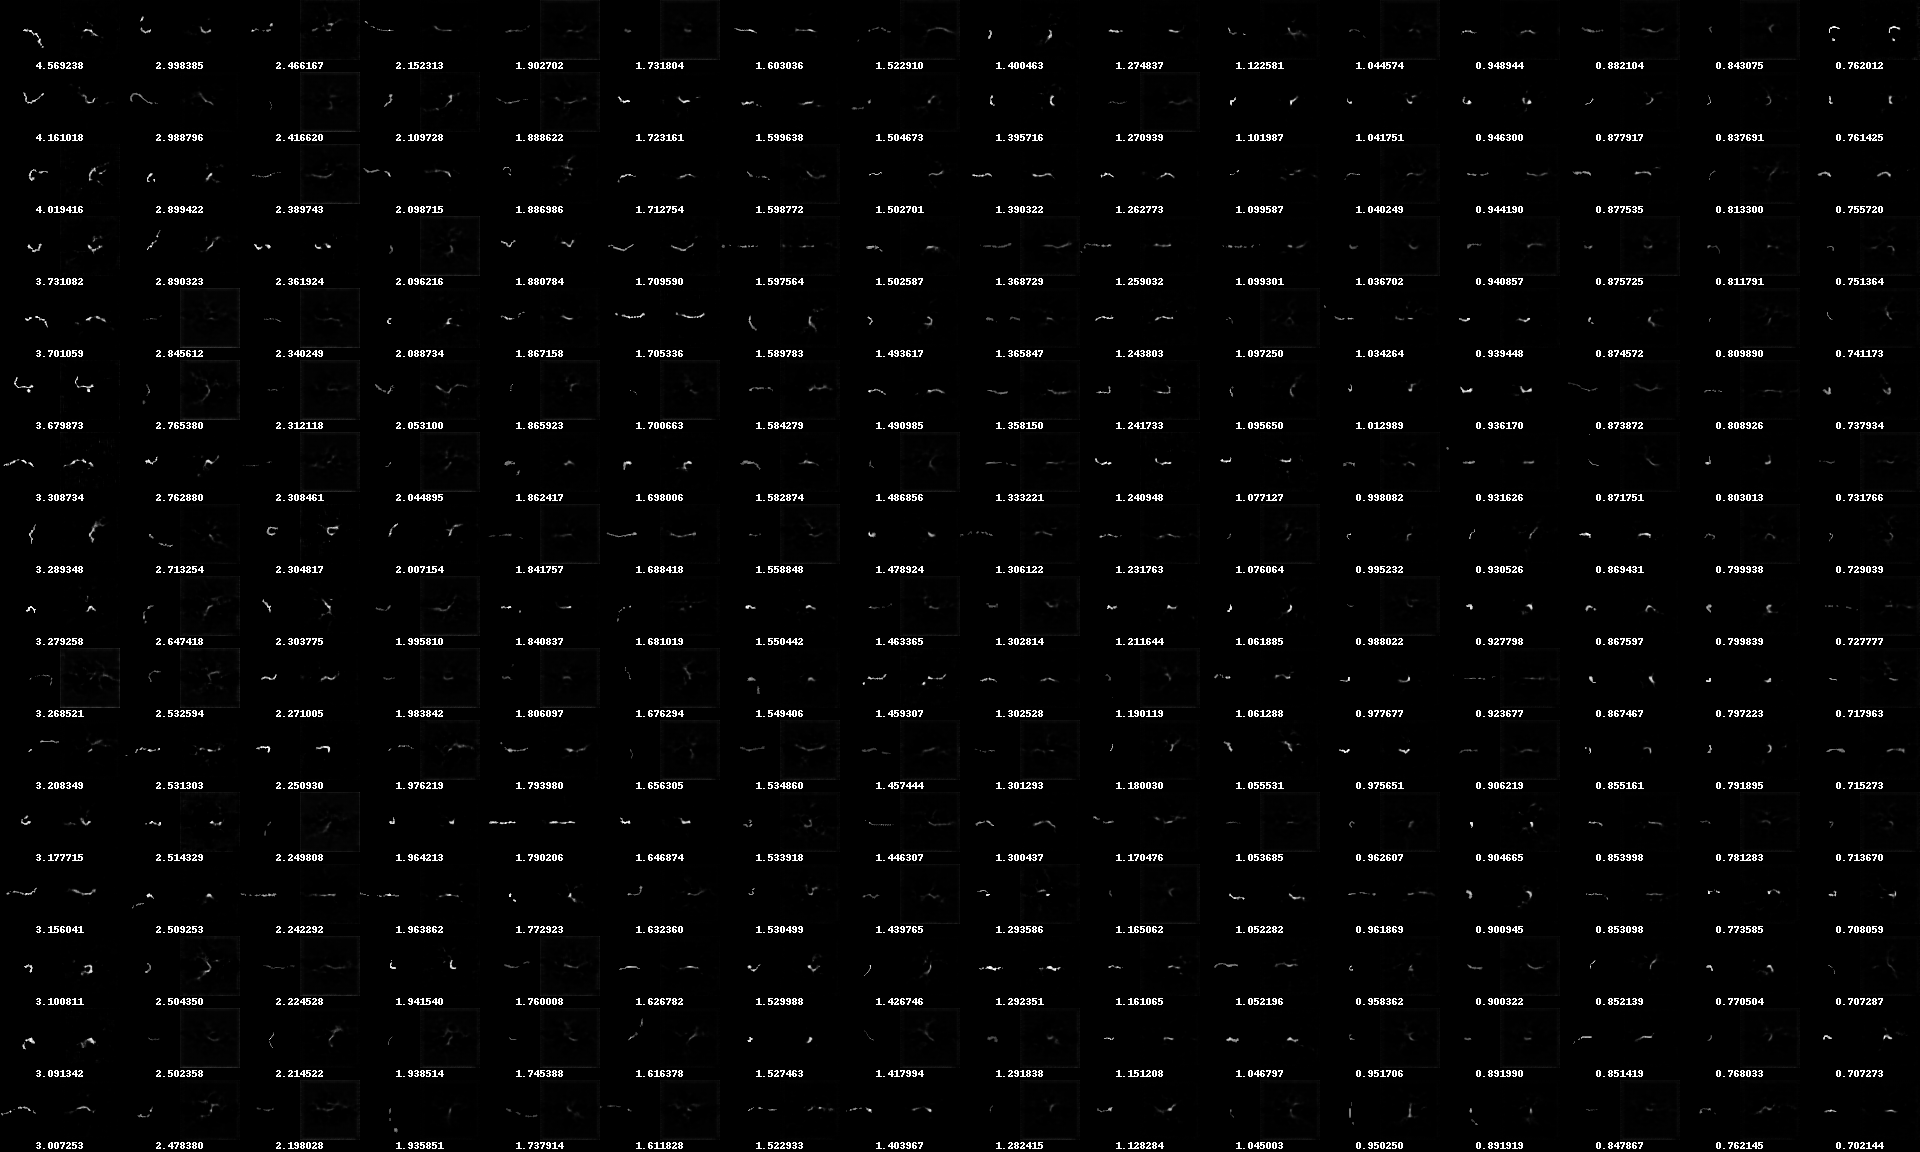

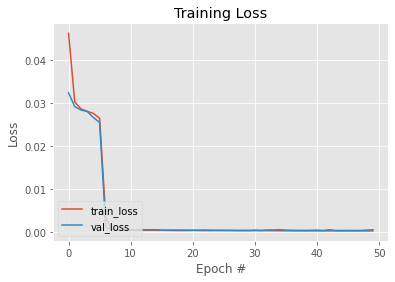

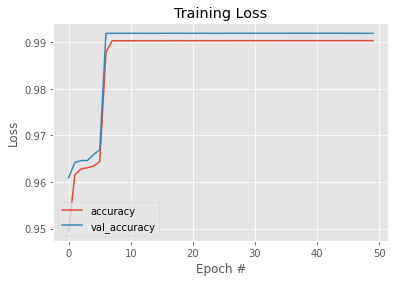

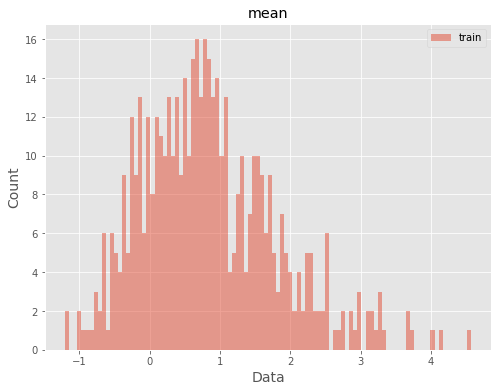

In [5]:
load_and_train(WORMS_DST, WORMS_AC)

320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
Epoch 1/50
445/445 [==============================] - 7s 14ms/step - loss: 0.0222 - accuracy: 0.9750 - val_loss: 0.0010 - val_accuracy: 0.9939
Epoch 2/50
445/445 [==============================] - 6s 13ms/step - loss: 6.2315e-04 - accuracy: 0.9926 - val_loss: 6.8788e-04 - val_accuracy: 0.9939
Epoch 3/50
445/445 [==============================] - 6s 13ms/step - loss: 4.2390e-04 - accuracy: 0.9926 - val_loss: 6.9934e-04 - val_accuracy: 0.9938
Epoch 4/50
445/445 [==============================] - 6s 13ms/step - loss: 3.4849e-04 - accuracy: 0.9926 - val_loss: 0.0013 - val_accuracy: 0.9938
Epoch 5/50
445/445 [==============================] - 6s 13ms/step - loss: 2.9714e-04 - accuracy: 0.9926 - val_loss: 4.2455e-04 - val_accuracy: 0.9938
Epoch 6/50
445/445 [==============================] - 6s 13ms/step - loss: 2.5189e-04 - accuracy: 0.9926 - val_loss: 3.2075e-04 - val_accuracy: 0.9939
Epoch 7/50
445/445 [==================

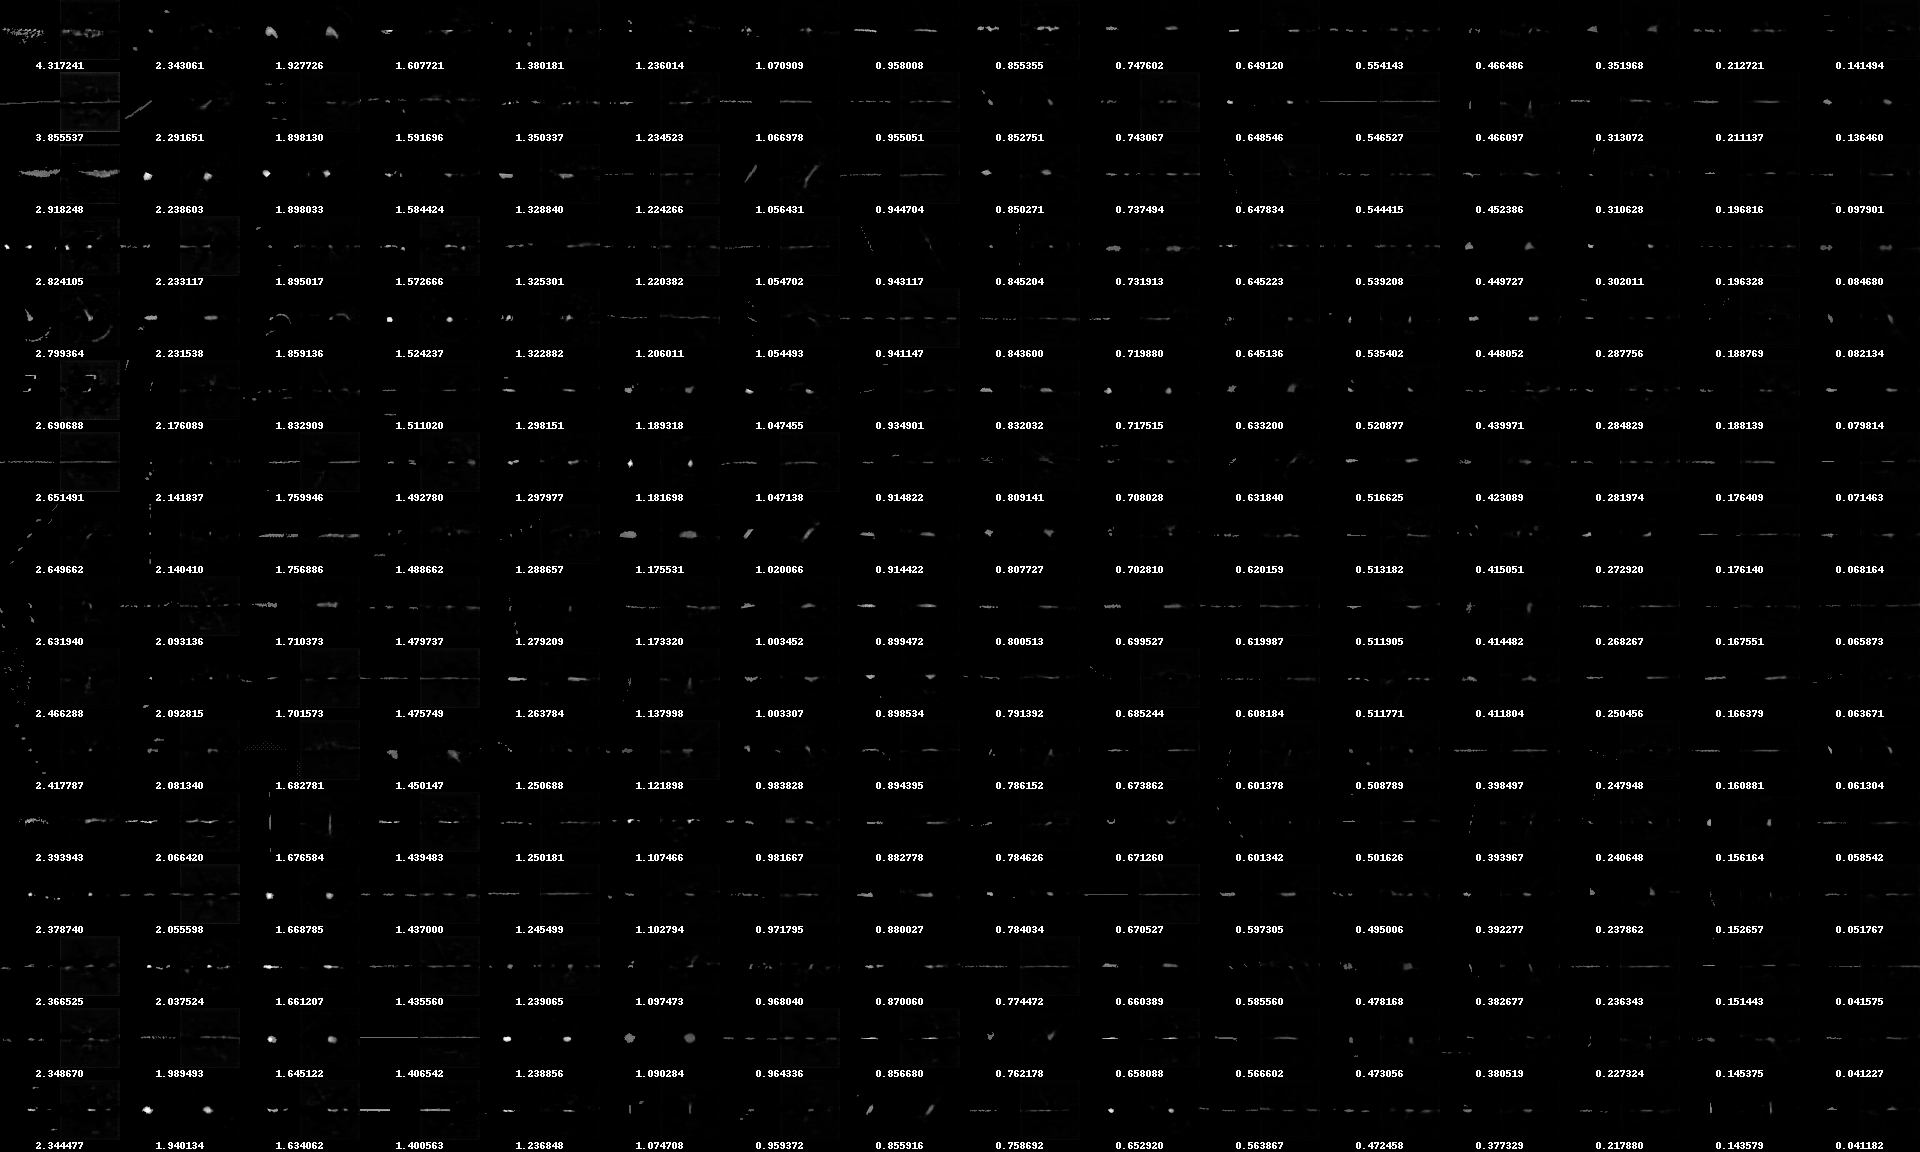

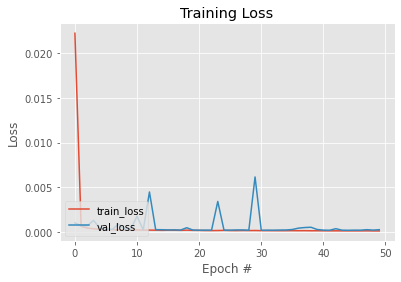

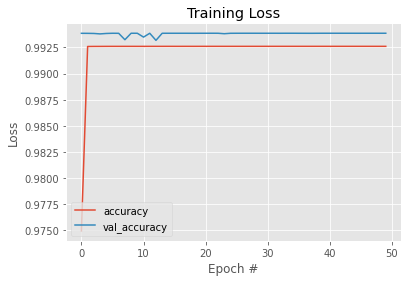

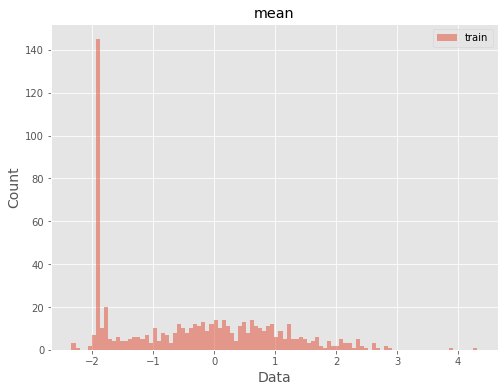

In [6]:
load_and_train(ARTIFACTS_DST, ARTIFACTS_AC)